# NYC COVID-19 summary

**Data source:** New York City Health Department's [COVID-19 Daily Data Summary](https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf)

## 0. Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## 1. Read Data

In [2]:
update_str = 'as reported by NYC Health on March 21, 2020, 5:30pm'
source_str = 'Sources: nyc.gov/coronavirus & carlos-afonso.github.io/COVID-19'

data_file = '../data/nyc-health-daily-data-summary/nyc-covid-19-summary.csv'

df = pd.read_csv(data_file)
df

,date,total_cases,age_median,age_min,age_max,age_0_to_4,age_5_to_17,age_18_to_49,age_50_to_64,age_65_and_over,...,sex_female,sex_male,sex_unknown,borough_bronx,borough_brooklyn,borough_manhattan,borough_queens,borough_staten_island,borough_unknown,deaths
0,2020-03-17,923,NaN,NaN,NaN,0,25,457,211,230,...,378,536,NaN,106,236,290,248,42,1,10
1,2020-03-18,2009,NaN,NaN,NaN,5,42,1034,463,464,...,850,1155,4.0,303,505,590,533,77,1,19
2,2020-03-19,3954,NaN,NaN,NaN,14,94,2117,926,800,...,1630,2315,9.0,496,1195,1038,1042,179,4,26
3,2020-03-20,5683,45.0,0.0,105.0,26,131,3080,1330,1112,...,2317,3355,11.0,736,1740,1402,1514,285,6,43
4,2020-03-21,8115,45.0,0.0,105.0,34,189,4456,1929,1502,...,3318,4787,10.0,1071,2484,1863,2254,437,6,60


## 2. Cases by Age Group

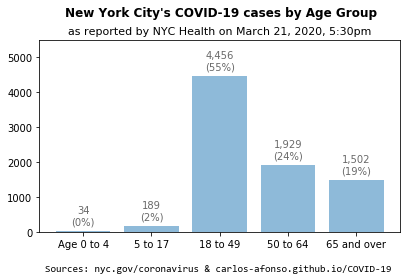

In [3]:
fig = plt.figure()

cols = ['age_0_to_4', 'age_5_to_17', 'age_18_to_49', 'age_50_to_64', 'age_65_and_over']
labels = ['Age 0 to 4', '5 to 17', '18 to 49', '50 to 64', '65 and over']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 5500)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('New York City\'s COVID-19 cases by Age Group', x=0.52, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.55, -1100, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [4]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-age-group'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 3. Cases by Sex

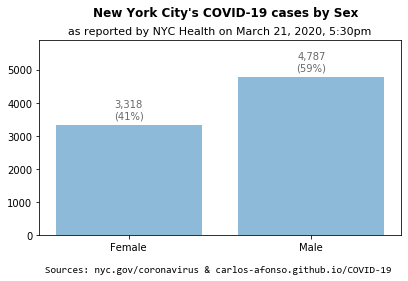

In [5]:
fig = plt.figure()

cols = ['sex_female', 'sex_male']
labels = ['Female', 'Male']
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 5900)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('New York City\'s COVID-19 cases by Sex', x=0.53, fontweight='bold')
plt.title(update_str, fontsize=11)

plt.text(-0.46, -1100, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [6]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-sex'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## 3. Cases by Borough

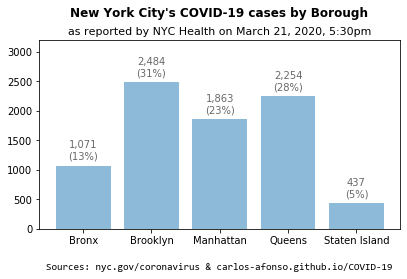

In [7]:
fig = plt.figure()

boroughs = ['bronx', 'brooklyn', 'manhattan', 'queens', 'staten_island']
cols = ['borough_' + b for b in boroughs]
labels = [b.replace('_', ' ').title() for b in boroughs]
values = df.iloc[-1][cols].values.astype(int)
total = sum(values)

plt.bar(labels, values, alpha=0.5)

plt.ylim(0, 3200)

for xy in zip(range(len(values)), values):
    note = '{:,}'.format(xy[1]) + '\n(' + str(int(round(100 * xy[1] / total, 0))) + '%)'
    plt.annotate(note, xy=xy, xytext=(0, 15), textcoords='offset points', ha='center', va='center', color='dimgray')

plt.suptitle('New York City\'s COVID-19 cases by Borough', x=0.515, fontweight='bold')

plt.title(update_str, fontsize=11)

plt.text(-0.55, -700, source_str, fontfamily='Consolas')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [8]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-by-borough'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)